In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

2025-03-27 22:40:52.662367: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


### **Création du générateur**

In [3]:
base_sure_directory = '/home/barrage/groupe2/base_sure'

In [4]:
def extract_label_from_filename(filename):
    vote = filename.split('-')[1] 
    label = int(vote.split('_')[0]) 
    return label

### **Le générateur** 

In [ ]:
class ImageLabelGenerator(Sequence):
    def __init__(self, image_dir, image_filenames, batch_size=32, target_size=(224, 224), shuffle=True):
        self.image_dir = image_dir
        self.image_filenames = image_filenames
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(len(self.image_filenames))
        #return int(np.floor(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, index):
        batch_filenames = self.image_filenames[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        labels = []

        for filename in batch_filenames:
            label = extract_label_from_filename(filename)

            img_path = os.path.join(self.image_dir, filename)
            image = load_img(img_path, target_size=self.target_size)
            image = img_to_array(image)
            #image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
            #image = preprocess_input(image)

            images.append(image)
            labels.append(label)

        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.image_filenames)

In [8]:
all_images = [f for f in os.listdir(base_sure_directory) if f.endswith('.jpg')]

train_files, val_files = train_test_split(all_images, test_size=0.2, random_state=42, shuffle=True)

train_generator = ImageLabelGenerator(base_sure_directory, train_files, batch_size=32)
val_generator = ImageLabelGenerator(base_sure_directory, val_files, batch_size=32, shuffle=False)

In [9]:
print(train_generator.__len__())
print(val_generator.__len__())

957
240


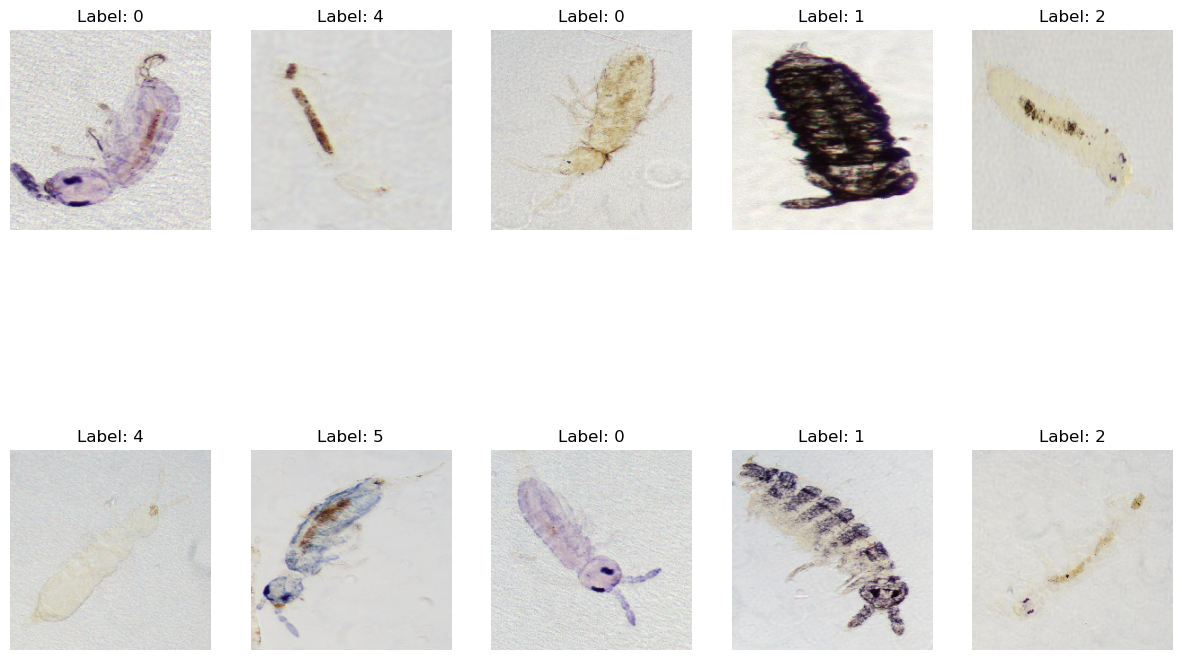

In [10]:
images, labels = train_generator[0]

# Afficher 10 images du dataset
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 lignes et 5 colonnes pour afficher 10 images
    plt.imshow(images[i].astype('uint8'))
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')  # Désactive l'affichage des axes
plt.show()

In [ ]:
train_labels = []
for batch_images, batch_labels in train_generator:
    train_labels.extend(batch_labels)
    
train_labels = np.array(train_labels)
unique_train_labels = np.unique(train_labels)

# Extraire les labels uniques du générateur de validation
val_labels = []
for batch_images, batch_labels in val_generator:
    val_labels.extend(batch_labels)
    

val_labels = np.array(val_labels)
unique_val_labels = np.unique(val_labels)

print("Classes présentes dans l'entraînement (train):", unique_train_labels)
print("Classes présentes dans la validation (val):", unique_val_labels)

print(f"Nombre de classes dans l'entraînement : {len(unique_train_labels)}")
print(f"Nombre de classes dans la validation : {len(unique_val_labels)}")

Classes présentes dans l'entraînement (train): [0 1 2 3 4 5 6 7]
Classes présentes dans la validation (val): [0 1 2 3 4 5 6 7]
Nombre de classes dans l'entraînement : 8
Nombre de classes dans la validation : 8
